# Carbon-di-Oxide Analysis

### Setup  
Import libraries for data handling (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and path management (`pathlib`).

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### File path setup  
Define the base directory and specify the input path for the **pre-processed CO₂ emissions dataset** (`Final_CO2_Emissions_Dataset.csv`).

In [33]:
# Base directory
BASE_DIR = Path().resolve().parents[1]
INPUT_PATH = BASE_DIR / "data" / "pre_processed" / "Final_CO2_Emissions_Dataset.csv"

Configure Seaborn to use a clean `whitegrid` style with larger text (`talk` context) for better readability in plots.

In [34]:
# Set plot style
sns.set(style="whitegrid", context="talk")

### Analysis 1: Global CO₂ emissions data preparation  
- Load the **CO₂ emissions dataset**.  
- Clean the `year` column and ensure it is integer type.  
- Filter only the **World aggregate** (excluding individual countries).  
- Convert CO₂ values to numeric and fill missing values with 0.  
- Compute **total emissions including land-use change (LUC)** by combining fossil fuel/industry CO₂ with `land_use_change_co2`.  

This prepares the baseline global CO₂ emissions series for further trend analysis.

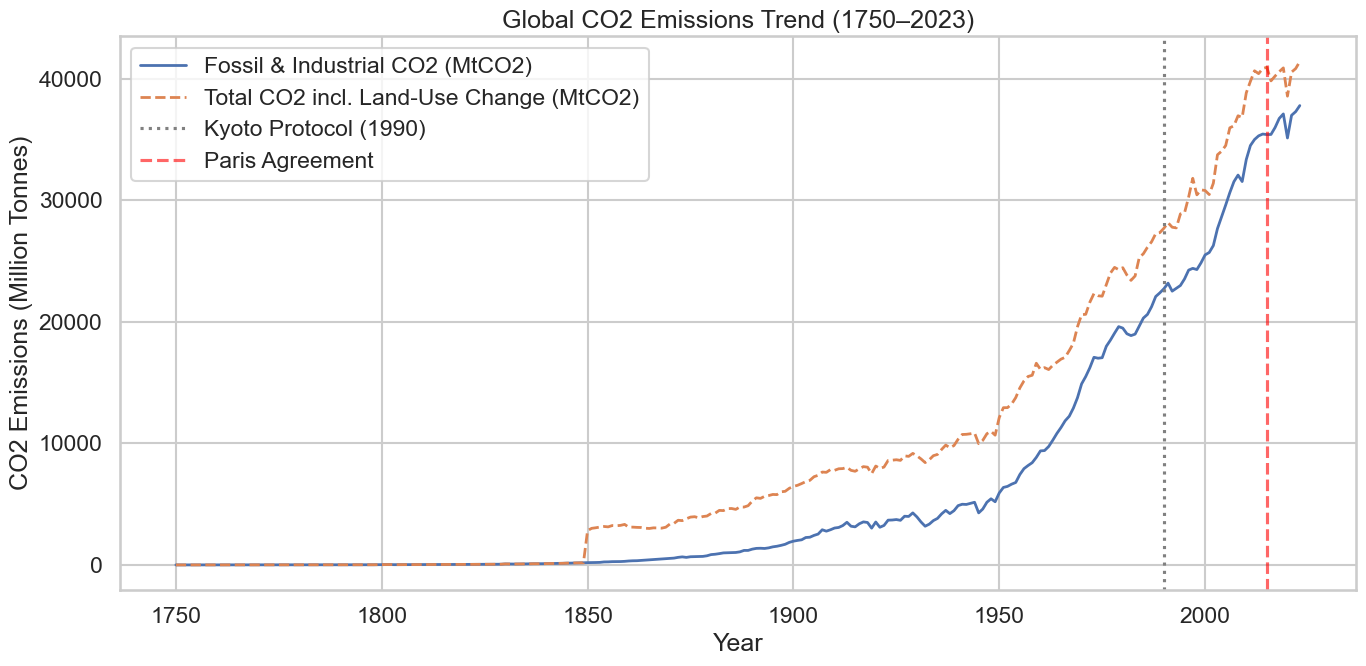

In [52]:
# Analysis 1

# Load and clean data
df = pd.read_csv(INPUT_PATH)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Filter WORLD data
df_world = df[df['country'].str.upper() == 'WORLD'].copy()

# Convert and clean relevant columns
df_world['co2'] = pd.to_numeric(df_world['co2'], errors='coerce').fillna(0)
df_world['land_use_change_co2'] = pd.to_numeric(df_world['land_use_change_co2'], errors='coerce').fillna(0)

# Compute total emissions including LUC
df_world['co2_including_luc'] = df_world['co2'] + df_world['land_use_change_co2']

### Plot: Global CO₂ emissions (1750–2023)  
- **Blue line:** Fossil fuel & industrial CO₂ emissions (in MtCO₂).  
- **Dashed orange line:** Total emissions including **land-use change (LUC)** such as deforestation and agriculture.  
- **Vertical markers:**  
  - **1990 (gray):** Kyoto Protocol – first binding climate treaty.  
  - **2015 (red):** Paris Agreement – universal climate accord.  

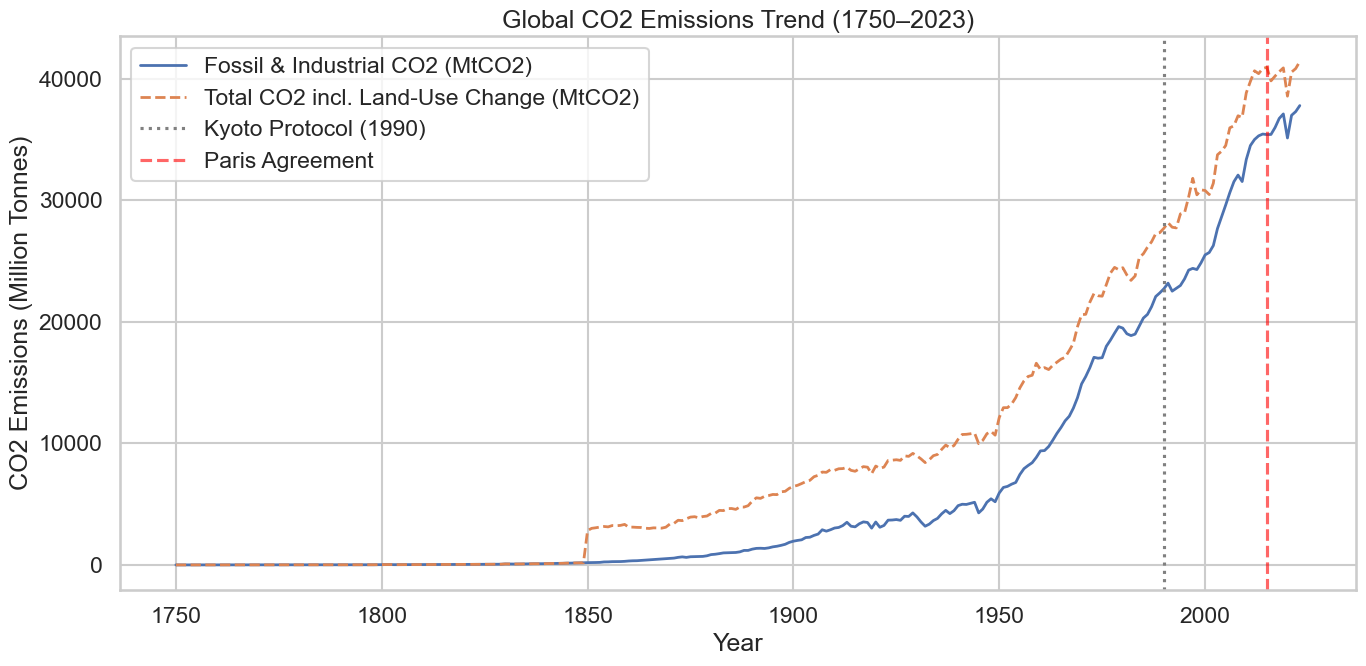

In [5]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_world['year'], df_world['co2'], label='Fossil & Industrial CO2 (MtCO2)', linewidth=2)
plt.plot(df_world['year'], df_world['co2_including_luc'], label='Total CO2 incl. Land-Use Change (MtCO2)', linestyle='--', linewidth=2)

# annotations
plt.axvline(x=1990, color='gray', linestyle=':', label='Kyoto Protocol (1990)')
plt.axvline(x=2015, color='red', linestyle='--', alpha=0.6, label='Paris Agreement')

plt.title("Global CO2 Emissions Trend (1750-2023)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million Tonnes)")
plt.legend()
plt.tight_layout()

# show plot
plt.show()

- **Blue line:** Fossil fuel & industrial emissions (MtCO₂).  
- **Orange dashed line:** Total CO₂ including land-use change (LUC).  
- **Gray dotted line (1990):** Kyoto Protocol — first climate treaty.  
- **Red dashed line (2015):** Paris Agreement — universal climate accord.  

CO₂ emissions were negligible before the Industrial Revolution, then accelerated after 1950.  
Despite international agreements, global emissions continue rising, now exceeding **40,000 MtCO₂ per year (≈40 GtCO₂)**.


### Analysis 2: Prepare country-level CO₂ snapshot (latest year)
- Load the CO₂ dataset and clean core fields (`year`, `co2`).
- **Filter scope:** keep individual countries; drop global/aggregate lines  
  (`WORLD`, `INTERNATIONAL TRANSPORT/SHIPPING/AVIATION`, `DISPUTED`).  
- Identify the **most recent reporting year** and subset to that year (`df_latest`) for rankings/maps/comparisons.


In [5]:
# Analysis 2

# Load and clean data
df = pd.read_csv(INPUT_PATH)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')

excluded_entities = [
    'WORLD',
    'INTERNATIONAL TRANSPORT',
    'INTERNATIONAL SHIPPING',
    'INTERNATIONAL AVIATION',
    'DISPUTED'
]
df = df[~df['country'].str.upper().isin(excluded_entities)]

# Determine latest year
latest_year = df[df['co2'].notnull()]['year'].max()
df_latest = df[df['year'] == latest_year]

### Visualization: Top 10 CO₂ emitting countries (latest year)  
- Select the **10 largest emitters** by annual CO₂ output.  
- Horizontal bar chart shows emissions in **million tonnes (MtCO₂)**.  
- Each bar is labeled with the exact emission value.  

C:\Users\Sumukh D S\AppData\Local\Temp\ipykernel_19208\1722774940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_emitters, x='co2', y='country', hue=None, palette='Reds_r', legend=False)


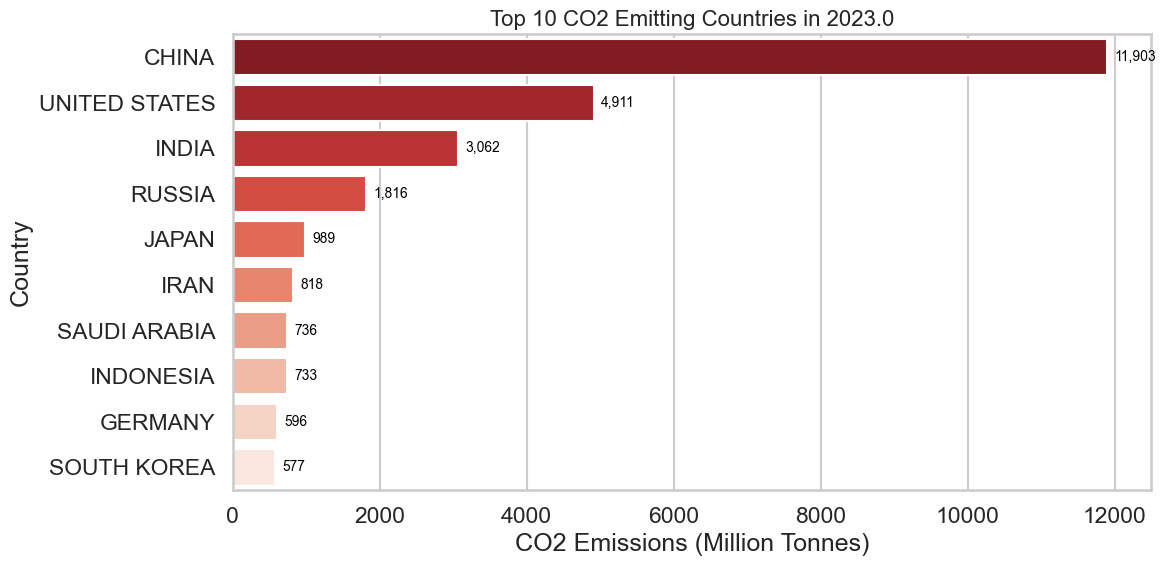

In [6]:
top_emitters = df_latest.nlargest(10, 'co2')[['country', 'co2']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x='co2', y='country', hue=None, palette='Reds_r', legend=False)

# Annotate bars
for i, (co2_value, country) in enumerate(zip(top_emitters['co2'], top_emitters['country'])):
    plt.text(co2_value + 100, i, f"{co2_value:,.0f}", va='center', fontsize=10, color='black')

plt.title(f"Top 10 CO2 Emitting Countries in {latest_year}", fontsize=16)
plt.xlabel("CO2 Emissions (Million Tonnes)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

- **China** dominates with ~11,900 MtCO₂ — more than double the US (~4,900 MtCO₂).  
- **India** (~3,000 MtCO₂) has shown rapid growth, reflecting post-1990 industrialization.  
- Other top emitters include Russia, Japan, Iran, Saudi Arabia, Indonesia, Germany, and South Korea.  

**Key message:** Just **three countries (China, US, India)** account for over **50% of global CO₂ emissions**, highlighting the unequal distribution of responsibility and the importance of their policies for climate outcomes.


### Visualization: CO₂ emissions over time for top 5 countries  
- Line chart of historical emissions for the **top 5 emitters** (China, US, India, Russia, Japan).  
- **Vertical markers:**  
  - **1990 (gray):** Kyoto Protocol.  
  - **2015 (red):** Paris Agreement.  

This comparison highlights how global emission trends are **dominated by policy, industrialization, and energy choices** in a handful of countries.

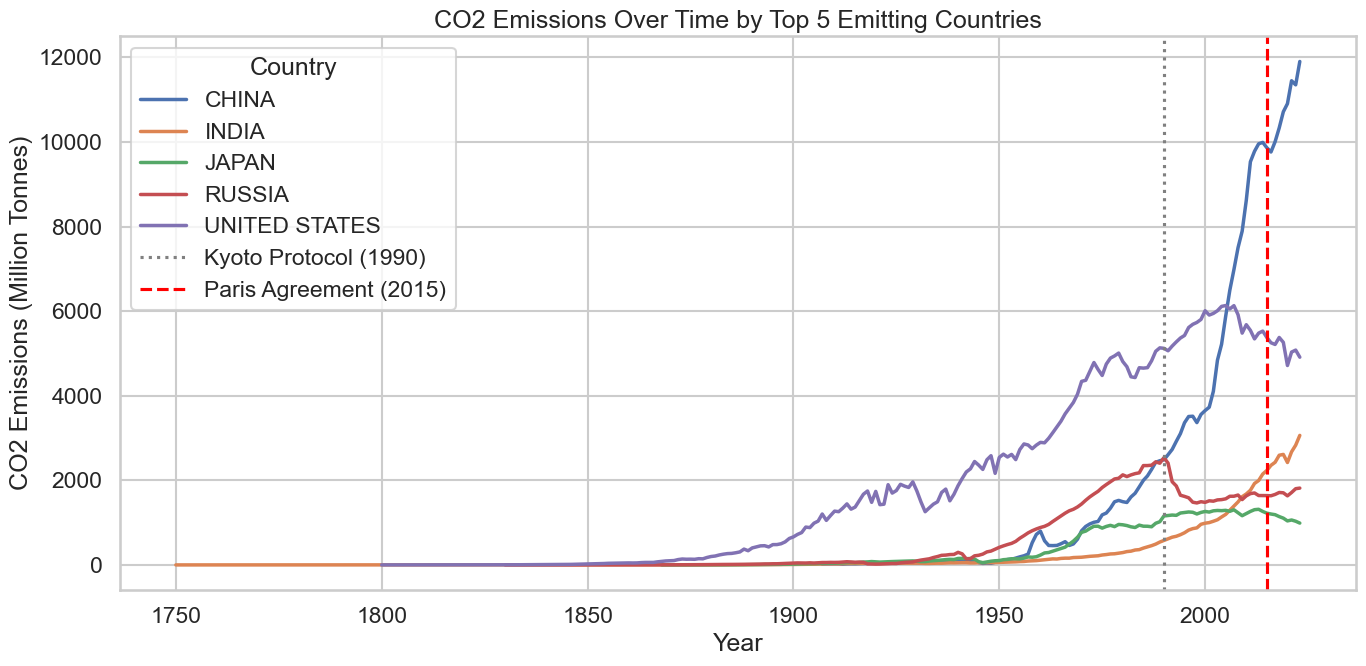

In [7]:
top5_countries = top_emitters.head(5)['country'].tolist()
df_top5_trend = df[df['country'].isin(top5_countries)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top5_trend, x='year', y='co2', hue='country', linewidth=2.5)

# Annotate policy milestones
plt.axvline(x=1990, color='gray', linestyle=':', label='Kyoto Protocol (1990)')
plt.axvline(x=2015, color='red', linestyle='--', label='Paris Agreement (2015)')

plt.title(f"C2 Emissions Over Time by Top 5 Emitting Countries", fontsize=18)
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million Tonnes)")
plt.legend(title="Country")
plt.tight_layout()

# Show Plot
plt.show()


- **China**: Explosive rise after 2000, now the world’s largest emitter.  
- **United States**: Strong rise through the 20th century, peak around 2005, then decline.  
- **India**: Continuous growth, accelerating after 1990, reflecting rapid industrialization.  
- **Russia**: Growth until the early 1990s, then a sharp fall after the Soviet collapse, stabilizing later.  
- **Japan**: Moderate emissions with no recent growth.  

**Key insight:** The global emission trajectory is dominated by the policy and energy choices of a few countries. Even with international agreements, major emitters continue to drive overall growth.

### Analysis 3: CO₂ emissions by fuel type
- Load and clean global CO₂ dataset, focusing on **fuel-specific columns**:  
  - Cement, Coal, Flaring, Gas, Oil, and Other Industry.  
- Convert to numeric, handle missing values, and sort by year.  
- Plot a **stacked area chart** to show the contribution of each fuel type to total emissions.  

This breakdown highlights the **fuel-driven nature of CO₂ growth** and shows why transitioning energy systems away from fossil fuels is critical.

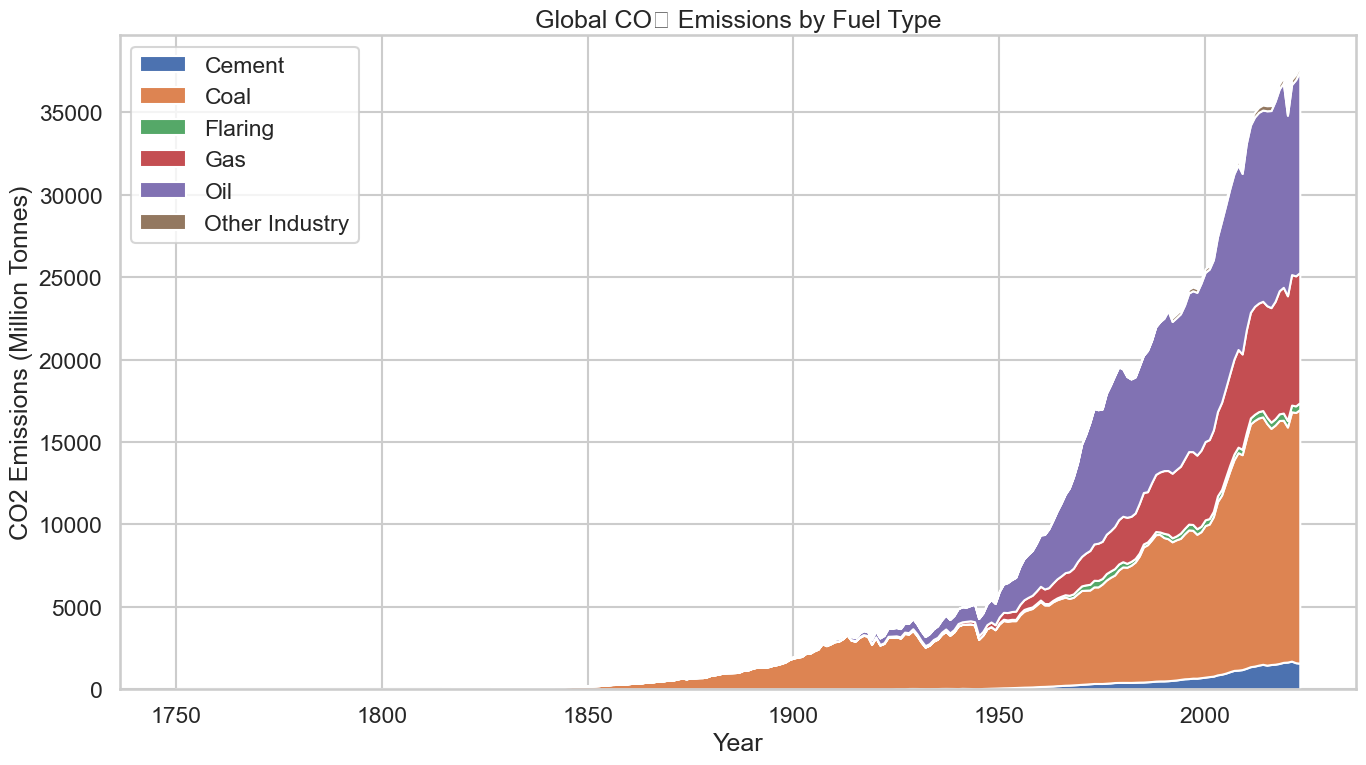

In [8]:
#Analysis 3

# Load and clean data
df = pd.read_csv(INPUT_PATH)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')

# Subset WORLD data
df_world = df[df['country'].str.upper() == 'WORLD'].copy()

# Convert fuel columns to numeric and handle NaNs
fuel_cols = ['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']
df_world[fuel_cols] = df_world[fuel_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Sort by year
df_world = df_world.sort_values('year')

# Plot stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(df_world['year'], 
              [df_world[col] for col in fuel_cols],
              labels=['Cement', 'Coal', 'Flaring', 'Gas', 'Oil', 'Other Industry'])

# Formatting
plt.title("Global CO2 Emissions by Fuel Type", fontsize=18)
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million Tonnes)")
plt.legend(loc="upper left")
plt.tight_layout()

# Show Plot
plt.show()

In [9]:
Shows the contribution of **different fuels and industries** to total global CO₂ emissions.  
- **Coal** (orange) is the largest contributor, accelerating after 1950.  
- **Oil** (purple) rose steeply after WWII, becoming the second-largest source.  
- **Gas** (red) has grown steadily since the 1970s.  
- **Cement** (blue) and **other industries** (brown) are smaller but steadily rising.  
- **Flaring** (green) is consistently minimal.  

**Key insight:** The global emissions surge is dominated by **coal, oil, and gas**, underscoring the challenge of phasing out fossil fuels in the energy mix.

### Analysis 4: Fuel shares in global CO₂ emissions  
- Focus on **World totals** and ensure years are sorted.  
- For each row (year), calculate the **total CO₂ across all fuel types**.  
- Compute percentage contribution (`fuel / total * 100`) for each fuel type:  
  - Cement, Coal, Flaring, Gas, Oil, Other Industry.  
- Replace invalid values (e.g., divide-by-zero cases) with 0.  

This prepares the dataset for visualizing the **relative share of each fuel** in global CO₂ emissions over time.


In [10]:
# Fuel columns (as found in your notebook)
fuel_cols = ['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']

# Ensure WORLD subset and sorted years
df_world = df[df['country'].str.upper() == 'WORLD'].copy()
df_world = df_world.sort_values('year')
df_world['year'] = pd.to_numeric(df_world['year'], errors='coerce')

# Row-wise total and percentage columns
row_total = df_world[fuel_cols].sum(axis=1)
for col in fuel_cols:
    df_world[f'{col}_pct'] = (df_world[col] / row_total) * 100

# Clean any NaNs/infs produced by division (e.g., if a row_total == 0)
pct_cols = [f'{c}_pct' for c in fuel_cols]
df_world[pct_cols] = df_world[pct_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

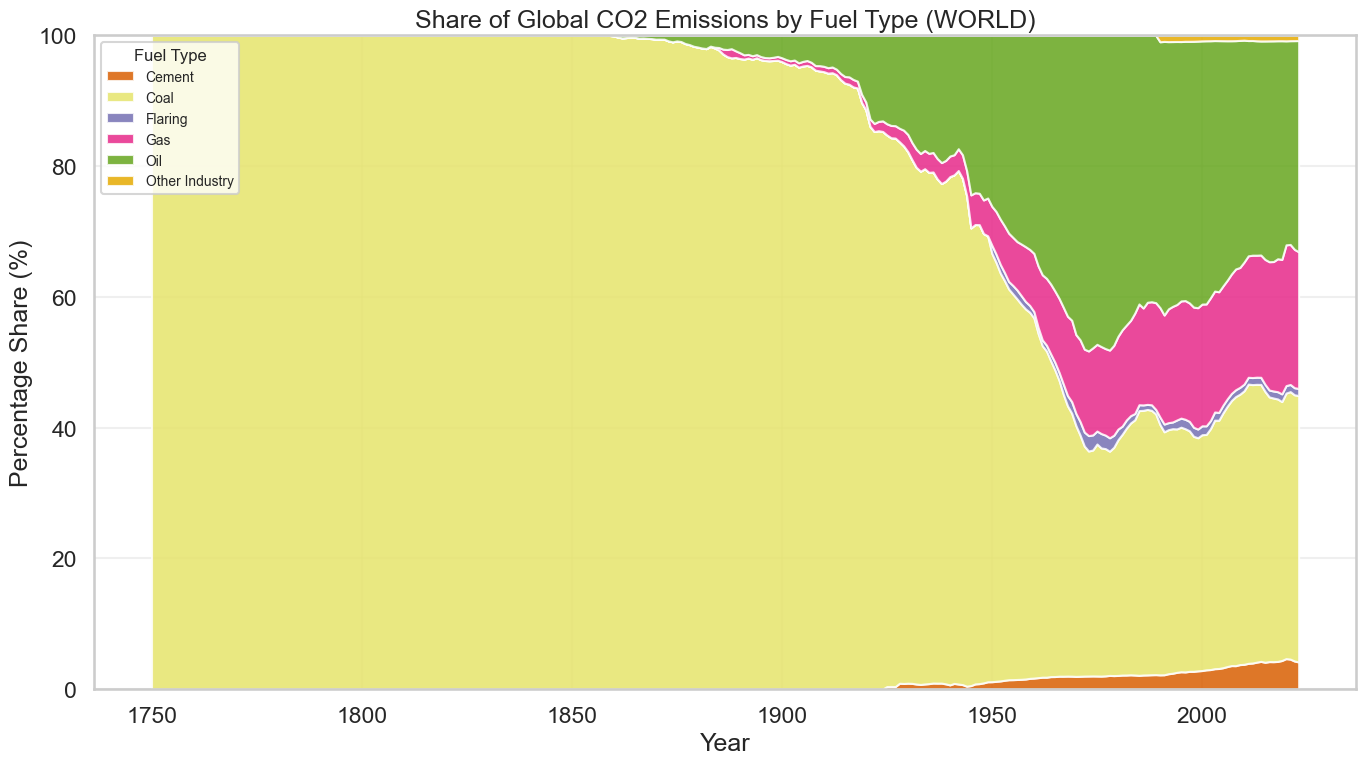

In [11]:
# Set custom color palette (6 colors for 6 series)
colors = ['#d95f02', '#e6e46b', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']

# Plot
plt.figure(figsize=(14, 8))
plt.stackplot(
    df_world['year'].to_numpy(),
    *[df_world[c].to_numpy() for c in pct_cols],
    labels=['Cement', 'Coal', 'Flaring', 'Gas', 'Oil', 'Other Industry'],
    colors=colors,
    alpha=0.85
)

plt.title("Share of Global CO2 Emissions by Fuel Type (WORLD)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Percentage Share (%)")
plt.ylim(0, 100)
plt.legend(loc='upper left', title='Fuel Type', fontsize=10, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Sumukh D S\AppData\Local\Temp\ipykernel_19208\3336642069.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_luc_share, x='land_use_share', y='country', palette='YlGnBu')


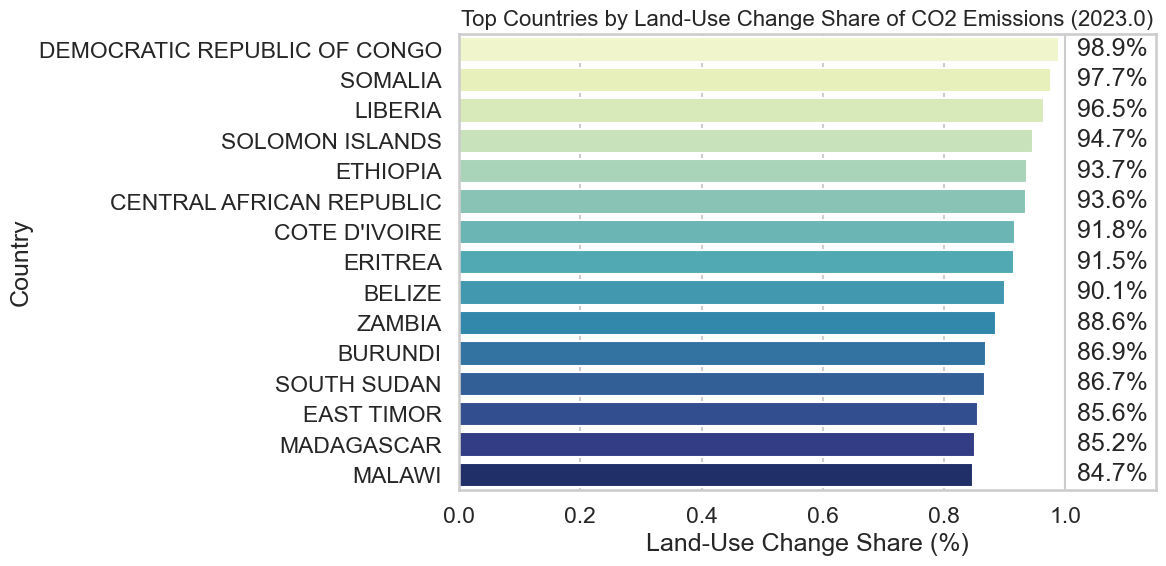

In [10]:
# Analysis 4: Land-Use Change vs Fossil Fuels

# Reload a clean copy of the dataset
df_luc = pd.read_csv(INPUT_PATH)

# Clean numeric fields
df_luc['year'] = pd.to_numeric(df_luc['year'], errors='coerce')
df_luc['co2'] = pd.to_numeric(df_luc['co2'], errors='coerce').fillna(0)
df_luc['land_use_change_co2'] = pd.to_numeric(df_luc['land_use_change_co2'], errors='coerce').fillna(0)

# Compute total and LUC share
df_luc['total_emissions'] = df_luc['co2'] + df_luc['land_use_change_co2']
df_luc = df_luc[df_luc['total_emissions'] > 0]  # remove rows with 0 total emissions
df_luc['land_use_share'] = df_luc['land_use_change_co2'] / df_luc['total_emissions']

# Filter for latest year and remove aggregates
latest_year = df_luc['year'].max()
excluded_entities = [
    'WORLD',
    'INTERNATIONAL TRANSPORT',
    'INTERNATIONAL SHIPPING',
    'INTERNATIONAL AVIATION',
    'DISPUTED'
]
df_latest = df_luc[(df_luc['year'] == latest_year) & (~df_luc['country'].str.upper().isin(excluded_entities))]

# Top 15 countries with highest land-use share
top_luc_share = df_latest.sort_values('land_use_share', ascending=False).head(15)

C:\Users\Sathvik\AppData\Local\Temp\ipykernel_21672\145239964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_luc_share, x='land_use_share', y='country', palette='YlGnBu')


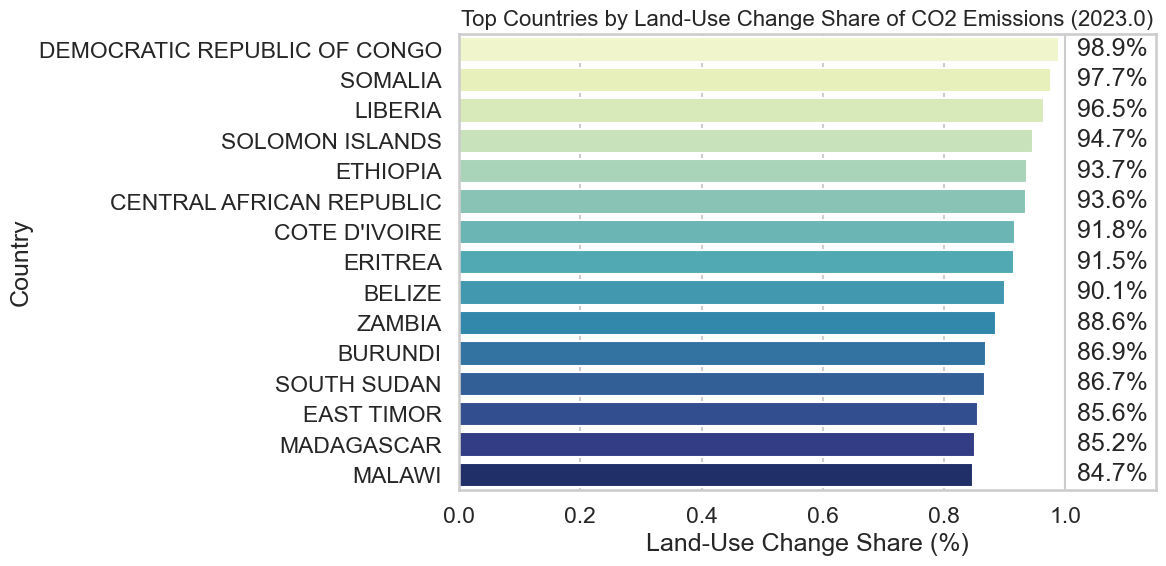

In [13]:
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_luc_share, x='land_use_share', y='country', palette='YlGnBu')
plt.title(f"Top Countries by Land-Use Change Share of CO2 Emissions ({latest_year})", fontsize=16)
plt.xlabel("Land-Use Change Share (%)")
plt.ylabel("Country")

# Set xlim a bit wider so there's space for labels
plt.xlim(0, 1.15)

# Annotate % values outside the bars
for i, val in enumerate(top_luc_share['land_use_share']):
    plt.text(1.02, i, f"{val*100:.1f}%", va='center')  # fixed x-position outside the chart

plt.tight_layout()
plt.show()

- The chart shows the top 15 countries where emissions are dominated by land-use change (LUC) rather than fossil fuels.
- Democratic Republic of Congo, Somalia, and Liberia top the list, with >95% of their emissions from LUC.
- Most countries in the list are African nations or developing regions with limited industrial emissions but high deforestation.
- LUC share in these countries often exceeds 85–98%, meaning fossil-fuel emissions are almost negligible.

This highlights the critical role of forest conservation and sustainable land practices in global climate strategies, especially for these regions.

### Choropleth: Share of CO₂ Emissions from Land-Use Change
- Uses `plotly.express.choropleth` to create an interactive world map.  
- Colors each country by the share of its CO₂ emissions from land-use change (`land_use_share`).  
- Data source: `df_latest`, filtered for the most recent year (2023).  
- Yellow–Green–Blue color scale highlights differences (low → high).  
- Hover tooltips show country name and exact percentage.  
- Layout removes borders, keeps coastlines, and formats colorbar in %.  

In [11]:
import plotly.express as px

# Choropleth using already cleaned `df_luc`
fig = px.choropleth(
    df_latest,  # from previous steps in your notebook
    locations="country",
    locationmode="country names",
    color="land_use_share",
    hover_name="country",
    color_continuous_scale="YlGnBu",
    title=f"Share of CO₂ Emissions from Land-Use Change by Country ({latest_year})",
    labels={"land_use_share": "Land-Use CO₂ Share"}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="LUC Share (%)", tickformat=".0%")
)

fig.show()

C:\Users\Sumukh D S\AppData\Local\Temp\ipykernel_19208\136150565.py:4: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


In [ ]:
# Non-interactive display
fig.show(config={"staticPlot": True})

In [ ]:
import os
import plotly.io as pio

# Define output folder and file
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Save as PNG (with extension in path)
OUTPUT_DIR = os.path.join(OUTPUT_PATH, "luc_share_map.png")
pio.write_image(fig, OUTPUT_DIR, scale=2)

In [25]:
### Analysis 5: Production vs. Consumption accounting
- Reload a clean copy of the dataset and coerce key fields to numeric: `year`, `co2` (production-based), `consumption_co2`, `trade_co2`.
- Drop rows with missing values in any of these fields.
- Subset to focus countries: China, United States, India, Russia, Japan, United Kingdom, Germany, Ireland.
- Purpose: compare **where emissions are produced** vs **where goods are consumed**, using `trade_co2` (net imports = consumption − production) to reveal offshoring of carbon.

In [17]:
# Analysis 5: Production vs. Consumption Accounting

# Reload clean dataset to avoid modified df
df_trade = pd.read_csv(INPUT_PATH)

# Clean and prepare numeric fields
df_trade['year'] = pd.to_numeric(df_trade['year'], errors='coerce')
df_trade['co2'] = pd.to_numeric(df_trade['co2'], errors='coerce')  # production-based
df_trade['consumption_co2'] = pd.to_numeric(df_trade['consumption_co2'], errors='coerce')
df_trade['trade_co2'] = pd.to_numeric(df_trade['trade_co2'], errors='coerce')

# Filter valid rows
df_trade = df_trade.dropna(subset=['year', 'co2', 'consumption_co2', 'trade_co2'])

# Focus on selected countries (Germany, UK, China, USA, India)
focus_countries = ['CHINA', 'UNITED STATES', 'INDIA', 'RUSSIA', 'JAPAN', 'UNITED KINGDOM', 'GERMANY', 'IRELAND']
df_focus = df_trade[df_trade['country'].isin(focus_countries)]

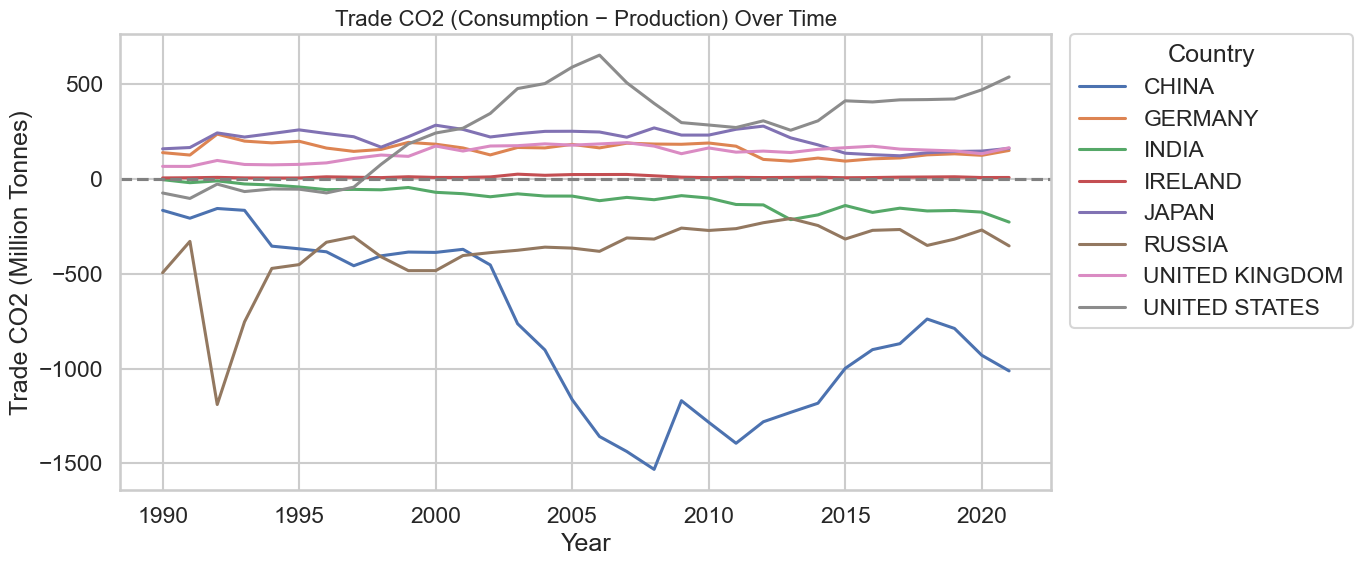

In [18]:
# Step 5: Plot Trade CO₂ over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_focus, x='year', y='trade_co2', hue='country', linewidth=2.2)

# Horizontal reference line
plt.axhline(0, color='gray', linestyle='--')

# Labels and title
plt.title("Trade CO2 (Consumption − Production) Over Time", fontsize=16)
plt.ylabel("Trade CO2 (Million Tonnes)")
plt.xlabel("Year")

# Improved legend placement (outside the plot)
plt.legend(
    title="Country",
    bbox_to_anchor=(1.02, 1),  # move legend outside right
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

Fitting auto_arima to determine best (p,d,q)...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3218.092, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3289.037, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3252.638, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3245.832, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3287.146, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3229.898, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3227.877, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=3219.617, Time=0.29 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3219.600, Time=0.31 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3232.586, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3227.765, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3228.595, Time=0.21 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=3221.599, Time=0.30 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3217.957,

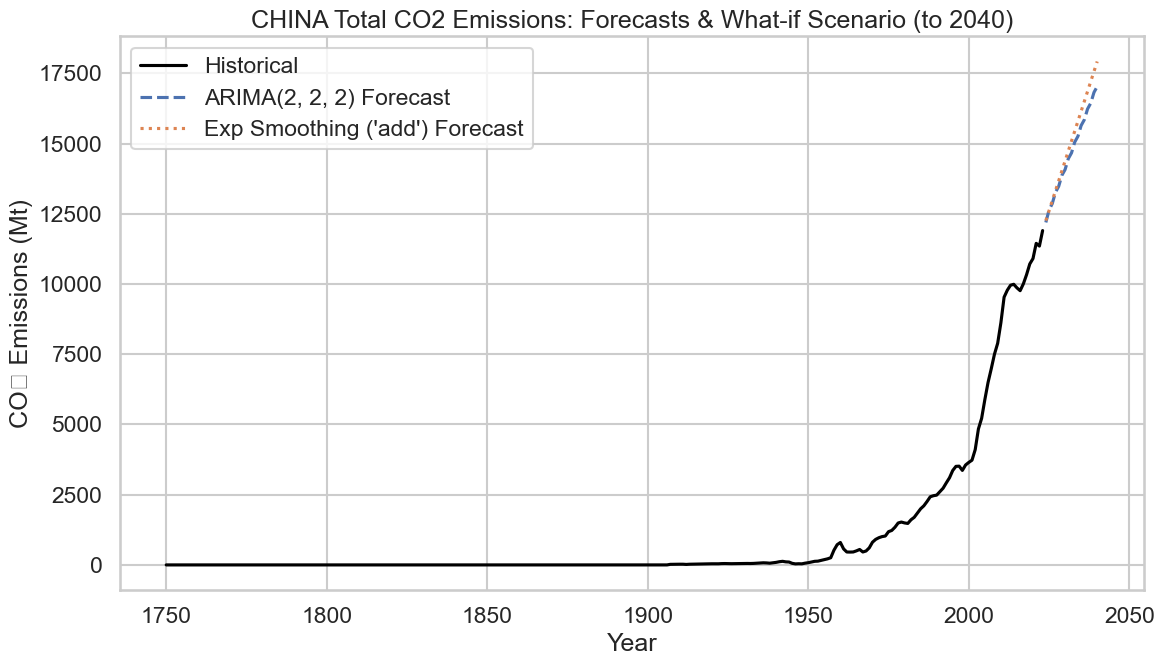


ARIMA(2, 2, 2) (AIC=3217.96) Forecasted Emissions:
  2030: 14074.24 Mt CO₂
  2040: 17032.03 Mt CO₂

Exp Smoothing ('add') (AIC=2492.01) Forecasted Emissions:
  2030: 14380.94 Mt CO₂
  2040: 17921.56 Mt CO₂


In [26]:
#Analysis 6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

try:
    import pmdarima as pm
except ImportError:
    pm = None

warnings.filterwarnings('ignore')

- **Utility – `load_country_series(input_path, country, emission_col)`**
  - Filter rows for a country (case-insensitive), sort by `year`, build a **Pandas Series** indexed by year.
  - Coerce to numeric; `NaN`→0 to avoid breaks in fitting.

- **Model search – `find_best_arima(ts)`**
  - Uses `pmdarima.auto_arima` *(non-seasonal)* to pick `(p,d,q)` by lowest **AIC**.
  - Args: `stepwise=True`, `max_p/q=4`, `max_d=2`, `seasonal=False`.
  - **Output:** best `(p,d,q)` and its AIC. *(Requires `pip install pmdarima`.)*

- **Model search – `find_best_es_trend(ts)`**
  - Tries Holt-Winters with trend ∈ {`None`, `'add'`, `'mul'`} (no seasonality).
  - Picks the **lowest AIC**; returns `best_trend` and AIC.

- **Forecast & plot – `forecast_and_plot(ts, arima_order, es_trend, forecast_end_year=2040)`**
  - Fits **ARIMA(order)** and **ExponentialSmoothing(trend)** on the historical series.
  - Forecasts yearly values up to `forecast_end_year`.
  - **Plot:** historical (black) + ARIMA (dashed) + ES (dotted), with legend and units (Mt CO₂).
  - **Console:** prints point forecasts for **2030** and **2040** for both models.
  - *(Optional what-if path for a 50% cut by 2040 is included but commented out.)*

- **Main run**
  - Set `country = 'CHINA'`, `emission_col = 'co2'` (production-based).
  - Run model selection → print summary → call `forecast_and_plot`.

In [20]:
# Utility Functions

def load_country_series(input_path, country, emission_col):
    df = pd.read_csv(input_path)
    df_country = df[df['country'].str.strip().str.lower() == country.lower()]
    df_country = df_country.sort_values('year')
    years = df_country['year'].astype(int)
    emissions = df_country[emission_col].astype(float)
    ts = pd.Series(emissions.values, index=years)
    return ts.fillna(0)

def find_best_arima(ts):
    if pm is None:
        raise ImportError("pmdarima is not installed. Please install with pip install pmdarima.")
    print("Fitting auto_arima to determine best (p,d,q)...")
    arima_model = pm.auto_arima(ts, seasonal=False, trace=True,
                                error_action='ignore', suppress_warnings=True,
                                stepwise=True, max_p=4, max_q=4, max_d=2)
    print(f"Best ARIMA order: {arima_model.order} (AIC={arima_model.aic():.2f})")
    return arima_model.order, arima_model.aic()

def find_best_es_trend(ts):
    print("\nTesting different trends for Exponential Smoothing...")
    trend_options = [None, 'add', 'mul']
    best_trend = None
    best_aic = np.inf
    for trend in trend_options:
        try:
            model_es = ExponentialSmoothing(ts, trend=trend, seasonal=None)
            fit_es = model_es.fit()
            aic = fit_es.aic
            print(f"Trend: {trend}, AIC: {aic:.2f}")
            if aic < best_aic:
                best_aic = aic
                best_trend = trend
        except Exception as e:
            print(f"Trend: {trend}, Error: {e}")
    print(f"\nBest trend for Exponential Smoothing: {best_trend} (AIC={best_aic:.2f})")
    return best_trend, best_aic

def forecast_and_plot(ts, arima_order, es_trend, forecast_end_year=2040):
    forecast_years = np.arange(ts.index.max()+1, forecast_end_year+1)
    # ARIMA forecast
    model_arima = ARIMA(ts, order=arima_order)
    model_arima_fit = model_arima.fit()
    forecast_arima = model_arima_fit.forecast(steps=len(forecast_years))
    arima_aic = model_arima_fit.aic
    # Exp Smoothing forecast
    model_es = ExponentialSmoothing(ts, trend=es_trend, seasonal=None)
    model_es_fit = model_es.fit()
    forecast_es = model_es_fit.forecast(steps=len(forecast_years))
    es_aic = model_es_fit.aic
    # # What-if scenario: 50% reduction by forecast_end_year
    # last_val = ts.iloc[-1]
    # whatif_emissions = np.linspace(last_val, last_val * 0.5, len(forecast_years))

    plt.figure(figsize=(12, 7))
    plt.plot(ts, label='Historical', color='black')
    plt.plot(forecast_years, forecast_arima, label=f'ARIMA{arima_order} Forecast', linestyle='--')
    plt.plot(forecast_years, forecast_es, label=f"Exp Smoothing ('{es_trend}') Forecast", linestyle=':')
    # plt.plot(forecast_years, whatif_emissions, label='"What-if": 50% Cut by 2040', linestyle='-.')
    plt.xlabel('Year')
    plt.ylabel('CO₂ Emissions (Mt)')
    plt.title(f"{country} Total CO2 Emissions: Forecasts & What-if Scenario (to {forecast_end_year})")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\nARIMA{arima_order} (AIC={arima_aic:.2f}) Forecasted Emissions:")
    for year in [2030, 2040]:
        idx = list(forecast_years).index(year)
        print(f"  {year}: {forecast_arima.iloc[idx]:.2f} Mt CO₂")

    print(f"\nExp Smoothing ('{es_trend}') (AIC={es_aic:.2f}) Forecasted Emissions:")
    for year in [2030, 2040]:
        idx = list(forecast_years).index(year)
        print(f"  {year}: {forecast_es.iloc[idx]:.2f} Mt CO₂")

    # print("\nWhat-if Scenario (50% reduction by 2040):")
    # for year in [2030, 2040]:
    #     idx = list(forecast_years).index(year)
    #     print(f"  {year}: {whatif_emissions[idx]:.2f} Mt CO₂")

Fitting auto_arima to determine best (p,d,q)...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3218.092, Time=0.67 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3289.037, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3252.638, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3245.832, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3287.146, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3229.898, Time=0.49 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3227.877, Time=0.48 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=3219.617, Time=0.96 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3219.600, Time=1.35 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3232.586, Time=0.39 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3227.765, Time=0.87 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3228.595, Time=0.69 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=3221.599, Time=1.26 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3217.957,

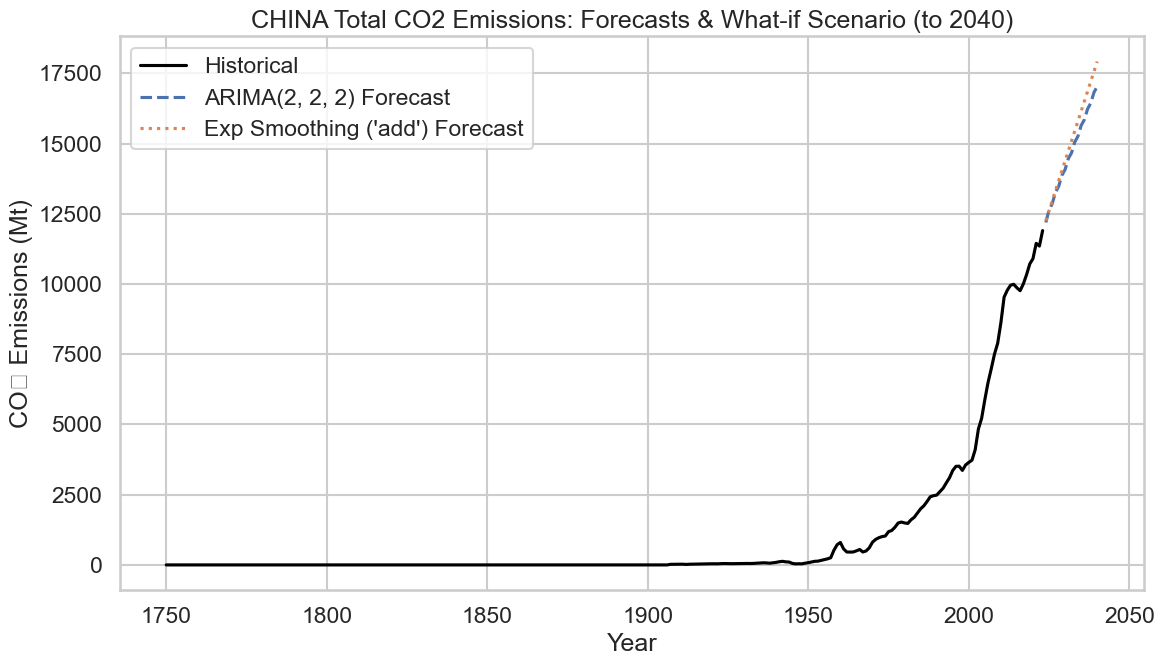


ARIMA(2, 2, 2) (AIC=3217.96) Forecasted Emissions:
  2030: 14074.24 Mt CO₂
  2040: 17032.03 Mt CO₂

Exp Smoothing ('add') (AIC=2492.01) Forecasted Emissions:
  2030: 14380.94 Mt CO₂
  2040: 17921.56 Mt CO₂


In [21]:
# ----------- Main Usage -----------
country = 'CHINA'
emission_col = 'co2'

# --- Code 1: Model Selection ---
ts = load_country_series(INPUT_PATH, country, emission_col)
arima_order, arima_aic = find_best_arima(ts)
es_trend, es_aic = find_best_es_trend(ts)

print("\nSummary of Best Models:")
print(f"  Best ARIMA order: {arima_order} (AIC={arima_aic:.2f})")
print(f"  Best Exponential Smoothing trend: {es_trend} (AIC={es_aic:.2f})")

# --- Code 2: Forecasting and Plotting ---
forecast_and_plot(ts, arima_order, es_trend)

- **Black line:** Historical emissions (1750–2022).  
- **Blue dashed line:** ARIMA(2,2,2) forecast → AIC = 3217.96.  
- **Orange dotted line:** Exponential Smoothing (‘add’) forecast → AIC = 2492.01 (better fit).  
- Both models predict **continued steep growth** through 2040.  
- **2030:** ~14,000 Mt CO₂ | **2040:** ~17,500 Mt CO₂.  

Takeaway: China’s emissions are projected to rise **~30% between 2030 and 2040** under current trends.
